In [18]:
from typing import List, Optional

from qiskit import transpile, QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.result import marginal_counts
from qiskit import Aer, transpile
from qiskit.tools.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi

import warnings
warnings.filterwarnings("ignore")

import math
pi=math.pi

In [19]:
from qiskit_ibm_provider import IBMProvider

# Save account credentials.
IBMProvider.save_account(token='a76db0c2a038fec5aad62ba5141aca5c2aef187d168f6e81eb2f2579cf829badead00b3bbea64d951884fe105d2470120ca4240a6255bf8b4afadbb448792922',overwrite=True)

provider = IBMProvider()

hub = "ibm-q-community"
group = "digiq-icfo-hack"
project = "main"

backend_name = "ibmq_jakarta" # 7 qubits
#backend_name = "ibmq_guadalupe	" # 16 qubits

backend = provider.get_backend(backend_name, instance=f"{hub}/{group}/{project}")

shots: int = 1024 # Number of shots to run each circuit for

print(len(backend.properties().qubits))

7


In [20]:
#Load and show and image
from PIL import Image
import numpy as np

image = Image.open("PM_519_1_zoom.jpg").convert('L')

#array = np.array(image)
#bw_array = np.where(array >= 128, 255, 0)
#bw_image = Image.fromarray(bw_array.astype(np.uint8))
#new_bw_array = np.array(bw_image)


# Convert image to grayscale
gray_image = image.convert("L")

# Get grayscale matrix as a numpy array
gray_matrix = np.array(gray_image)

# Print grayscale matrix

In [21]:
# Importing standard Qiskit libraries and configuring account
import qiskit as qk
from qiskit import QuantumCircuit, ClassicalRegister, Aer, IBMQ
from qiskit import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import plot_histogram
from math import pi

In [39]:
# Normalize the Intensity Matrix
to = 0
for i in range(8):
    for j in range(8):
        to += math.pow(gray_matrix[i][j],2)
        
total = math.sqrt(to)
#print(total)
norm_matrix = np.zeros([8,8])
#print(norm_matrix)
#print(gray_matrix)
for i in range(8):
    for j in range(8):
        norm_matrix[i][j] = gray_matrix[i][j]/total
        
#print(norm_matrix)


In [40]:
#Create the amp matrix
amp_matrix = np.zeros([8,8])

for i in range(8):
    for j in range(8):
        pixel_value = norm_matrix[i][j]
        if pixel_value != 0:
            amp_matrix[i][j] = np.sqrt(pixel_value)
            

In [41]:
n_qubits = 7
qc = QuantumCircuit(n_qubits)

for i in range(7):
    for j in range(7):
        amplitude = amp_matrix[i][j]
        if amplitude != 0:
            
            #initialize method to set the state of the corresponding qubit to a superposition of |0> and |1> 
            #with the specified amplitude.
            qc.initialize([amplitude, np.sqrt(1-amplitude**2)], [i])

In [42]:
#Apply the inverse QFT
#To convert the amplitudes into phase shifts, we need to apply the inverse QFT to the circuit.
qc.swap(0, n_qubits-1)
for i in range(n_qubits-1):
    qc.h(i)
    for j in range(i+1, n_qubits):
        #This is a diagonal and symmetric gate that induces a phase on the state of the target qubit, 
        #depending on the control state. (cphase gate)
        qc.cp(-np.pi/float(2**(j-i)), j, i)
    qc.barrier()
qc.h(n_qubits-1)
qc.swap(0, n_qubits-1)

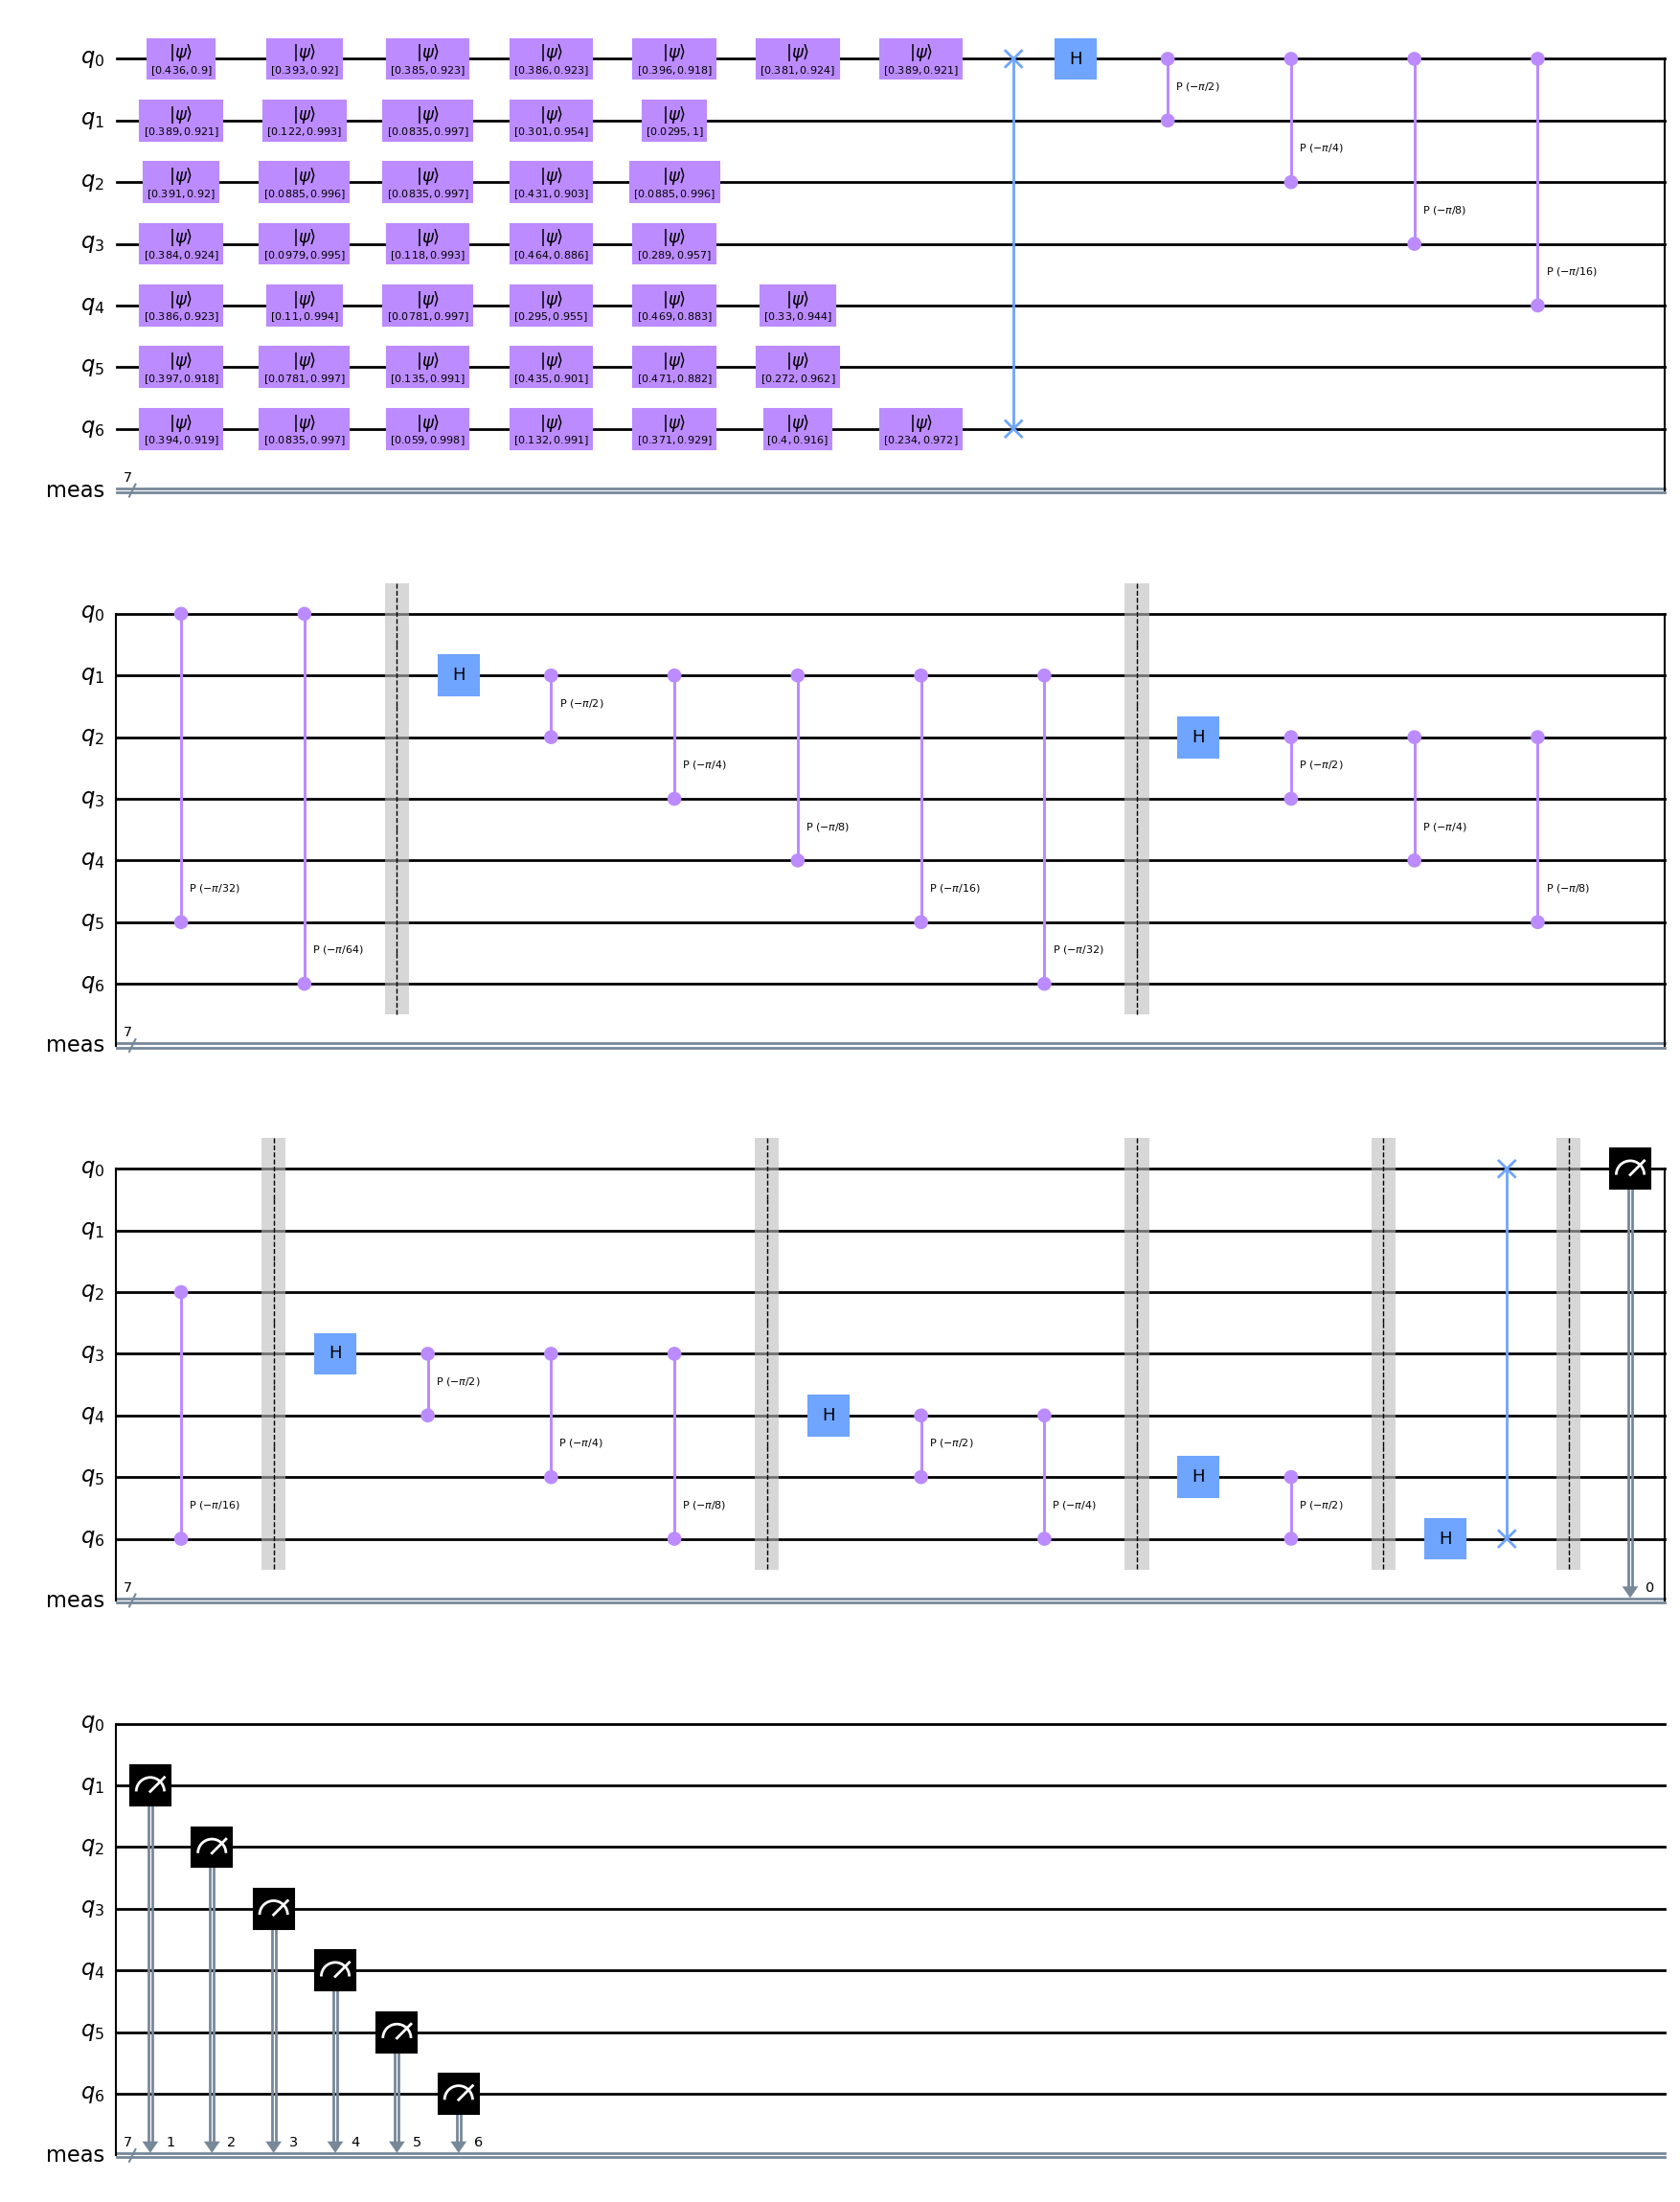

In [43]:
qc.measure_all()

qc.draw('mpl')

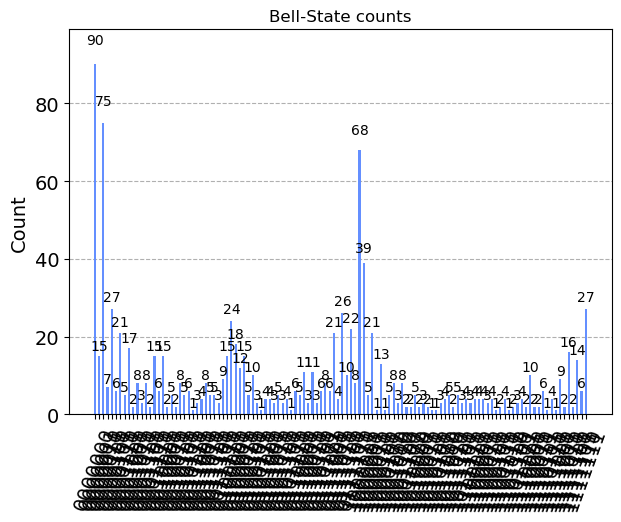

In [45]:
# Transpile for simulator
simulator = Aer.get_backend('aer_simulator')
circ = transpile(qc, simulator)

# Run and get counts
result = simulator.run(circ, shots=1024).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='Bell-State counts')

In [47]:
print(gray_matrix)

[[218 177 170 171 180 167 174 217]
 [174  17   8   0   0 104   1 177]
 [176   0   0   9   8 213   9 175]
 [169  11   0   0  16 247  96 166]
 [171  14   7   0 100 253 125 172]
 [181   0   7  21 217 255  85 175]
 [178   8   4  20 158 184  63 169]
 [218 178 167 189 173 179 171 220]]
